<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/Predict_Bitcoin_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Bitcoin Price
## In this project, Bitcoind price is predicted using different methods including tensorflow deep learning models

In [3]:
import tensorflow as tf
from tensorflow.keras.metrics import (MeanAbsoluteError, 
                                      MeanSquaredError, 
                                      RootMeanSquaredError, 
                                      MeanAbsolutePercentageError)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-09 05:43:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-09 05:43:22 (96.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Get Data:

In [6]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-09 05:43:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-09-09 05:43:23 (50.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [7]:
bit_df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
            parse_dates = ['Date'],
            index_col = ['Date'])
bit_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [8]:
bitcoin_price = pd.DataFrame(bit_df['24h Open (USD)'])
bitcoin_price.head()

,24h Open (USD)
Date,
2013-10-01,124.30466
2013-10-02,123.65499
2013-10-03,125.45500
2013-10-04,108.58483
2013-10-05,118.67466


In [9]:
bitcoin_price.rename({'24h Open (USD)':'price'}, axis = 1 , inplace =True)
bitcoin_price.head()

,price
Date,
2013-10-01,124.30466
2013-10-02,123.65499
2013-10-03,125.45500
2013-10-04,108.58483
2013-10-05,118.67466


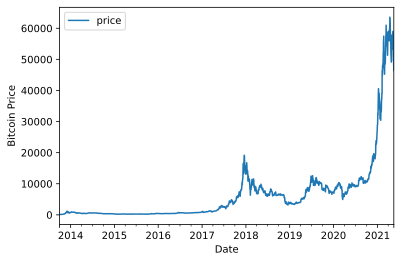

In [10]:
bitcoin_price.plot()
plt.ylabel('Bitcoin Price');

# Train Test Split:

In [11]:
price = bitcoin_price['price'].to_numpy()
price

array([  124.30466   ,   123.65499   ,   125.455     , ...,
       49926.03506746, 46805.53785192, 46439.3365698 ])

In [73]:
splitNum = int(0.75 * len(bitcoin_price))
X_train, y_train = bitcoin_price.index[:splitNum] , bitcoin_price['price'].to_numpy()[:splitNum]
X_test, y_test = bitcoin_price.index[splitNum:] , bitcoin_price['price'].to_numpy()[splitNum:]

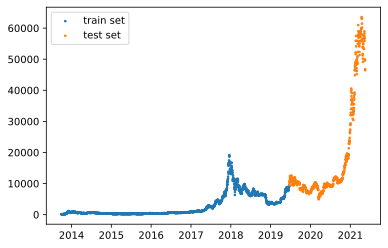

In [74]:
plt.scatter(X_train,y_train, s=3, label='train set')
plt.scatter(X_test,y_test, s=3, label='test set')
plt.legend();

# Experiments with different models:
## Naive Model: Simply, the forecast for the next day is the today`s value.

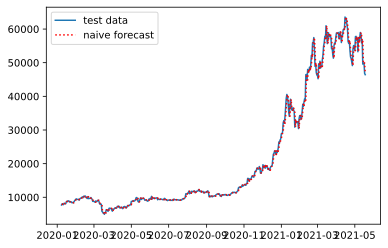

In [75]:
#start from 200 datapoint
plt.plot(X_test[200:], y_test[200:], label='test data')
plt.plot(X_test[201:], y_test[200:-1],'r:',label='naive forecast')
plt.legend();

### Evaluation:
MAE: Mean Absolute Error

MSE: Mean Squared Error

RMSE: Root Mean Squared Error

MAPE: Mean Absolute Percentage Error 

MASE: Mean Absolute Scaled Error

In [76]:
def errors(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  errors={'MAE': MeanAbsoluteError()(y_true, y_pred).numpy(),
          'MSE': MeanSquaredError()(y_true, y_pred).numpy(),
          'RMSE': RootMeanSquaredError()(y_true, y_pred).numpy(),
          'MAPE': MeanAbsolutePercentageError()(y_true, y_pred).numpy(),
          'MASE': (mae/mae_naive).numpy()}
            
  return errors

In [77]:
errors(y_test[1:], y_test[:-1])

{'MAE': 512.3212,
 'MSE': 997350.06,
 'RMSE': 998.67413,
 'MAPE': 2.612582,
 'MASE': 1.0003772339286328}

## function for turning a data vector to windows and horizons:

In [78]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [253]:
windows, labels = make_windows(price, window_size=7, horizon=1)
windows.shape, labels.shape

((2780, 7), (2780, 1))

In [254]:
windows[:3], labels[:3]

(array([[124.30466, 123.65499, 125.455  , 108.58483, 118.67466, 121.33866,
         120.65533],
        [123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ]]), array([[121.795],
        [123.033],
        [124.049]]))

## function for train test split:

In [255]:
def train_test_split(windows, labels, test_ratio=0.15):
  split_size = int((1-test_ratio) * len(windows))
  windows_train, labels_train = windows[:split_size], labels[:split_size]
  windows_test, labels_test = windows[split_size:], labels[split_size:]
  
  return windows_train, windows_test, labels_train, labels_test

In [256]:
windows_train, windows_test, labels_train, labels_test =train_test_split(windows, labels)
labels_train.shape, labels_test.shape

((2363, 1), (417, 1))

## model checkpoints:

## Model_1. ANN model, window=7, horizon=1

In [257]:
inputs = tf.keras.layers.Input(shape=(7))
x = tf.keras.layers.Dense(64, activation ='relu')(inputs)
x = tf.keras.layers.Dense(8, activation ='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_1 = tf.keras.Model(inputs, outputs)

In [258]:
model_1.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_42 (Dense)            (None, 64)                512       
                                                                 
 dense_43 (Dense)            (None, 8)                 520       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [259]:
model_1.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['mae'])

In [260]:
!rm -rf './checkpoints/model_1/'

In [261]:
filepath = './checkpoints/model_1/'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                    monitor='val_mae',
                                    verbose=0,
                                    save_best_only=True,
                                    save_weights_only=True)

In [262]:
history_1 = model_1.fit(windows_train, 
                        labels_train, 
                        epochs=150, 
                        validation_data=(windows_test,labels_test),
                        callbacks=[modelCheckpoint])

Epoch 1/150
74/74 [==============================] - 20s 3ms/step - loss: 26657630.0000 - mae: 3445.3176 - val_loss: 920911104.0000 - val_mae: 24008.5879
Epoch 2/150
74/74 [==============================] - 0s 2ms/step - loss: 3310728.7500 - mae: 778.9799 - val_loss: 4821830.0000 - val_mae: 1257.5264
Epoch 3/150
74/74 [==============================] - 0s 2ms/step - loss: 188610.1875 - mae: 195.5552 - val_loss: 4173378.0000 - val_mae: 1204.3248
Epoch 4/150
74/74 [==============================] - 0s 2ms/step - loss: 167514.7656 - mae: 186.1269 - val_loss: 4590507.0000 - val_mae: 1376.4022
Epoch 5/150
74/74 [==============================] - 0s 2ms/step - loss: 153474.9531 - mae: 179.5986 - val_loss: 3771639.0000 - val_mae: 1205.9133
Epoch 6/150
74/74 [==============================] - 0s 2ms/step - loss: 139127.7031 - mae: 167.0979 - val_loss: 3258464.7500 - val_mae: 1089.8929
Epoch 7/150
74/74 [==============================] - 0s 2ms/step - loss: 126581.4531 - mae: 158.3559 - val_los

### evaluation:

In [263]:
model_1.evaluate(windows_test, labels_test)

14/14 [==============================] - 0s 997us/step - loss: 1757774.8750 - mae: 764.7645


[1757774.875, 764.7645263671875]

In [264]:
model_1.load_weights('./checkpoints/model_1/')

In [265]:
model_1.evaluate(windows_test, labels_test)

14/14 [==============================] - 0s 1ms/step - loss: 1547792.8750 - mae: 682.2697


[1547792.875, 682.2697143554688]

Text(0.5, 0, 'epochs')

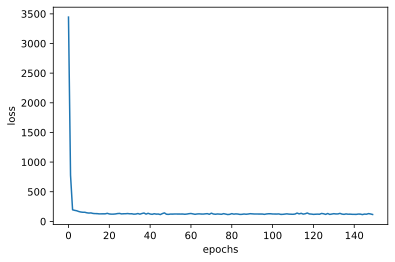

In [266]:
pd.DataFrame(history_1.history)['mae'].plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [267]:
labels_pred = model_1.predict(windows_test)

In [268]:
model_1_results = errors(labels_test, labels_pred)
model_1_results

{'MAE': 682.2697,
 'MSE': 1547792.9,
 'RMSE': 1244.1033,
 'MAPE': 2.4951506,
 'MASE': 0.9875505771676171}

In [269]:
np.squeeze(labels_test[:10]), np.squeeze(labels_pred[:10])

(array([6718.08487191, 6682.78062208, 6229.49331991, 5879.81683565,
        6483.6170416 , 6446.44266715, 6537.68699039, 6796.92519575,
        6772.00730095, 6873.72004752]),
 array([6729.147 , 6766.4233, 6656.756 , 6292.0605, 5912.0034, 6399.3833,
        6456.322 , 6569.65  , 6790.663 , 6756.1196], dtype=float32))

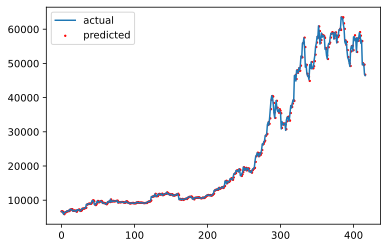

In [270]:
plt.scatter(range(len(labels_pred)),labels_pred,color='r', s=2, label='predicted')
plt.plot(labels_test, label='actual')
plt.legend();

## Model_2. ANN model, window=30, horizon=1

In [271]:
windows, labels = make_windows(price, window_size=30, horizon=1)
windows.shape, labels.shape

((2757, 30), (2757, 1))

### function for train test split:

In [272]:
def train_test_split(windows, labels, test_ratio=0.15):
  split_size = int((1-test_ratio) * len(windows))
  windows_train, labels_train = windows[:split_size], labels[:split_size]
  windows_test, labels_test = windows[split_size:], labels[split_size:]
  
  return windows_train, windows_test, labels_train, labels_test

In [273]:
windows_train, windows_test, labels_train, labels_test =train_test_split(windows, labels)
labels_train.shape, labels_test.shape

((2343, 1), (414, 1))

### model creation:

In [274]:
inputs = tf.keras.layers.Input(shape=(30))
x = tf.keras.layers.Dense(64, activation ='relu')(inputs)
x = tf.keras.layers.Dense(8, activation ='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_2 = tf.keras.Model(inputs, outputs)

In [275]:
model_2.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_45 (Dense)            (None, 64)                1984      
                                                                 
 dense_46 (Dense)            (None, 8)                 520       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,513
Trainable params: 2,513
Non-trainable params: 0
_________________________________________________________________


In [276]:
model_2.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['mae'])

In [277]:
# !rm -rf './checkpoints/model_2/'

In [278]:
filepath = './checkpoints/model_2/'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                    monitor='val_mae',
                                    verbose=0,
                                    save_best_only=True,
                                    save_weights_only=True)

In [279]:
history_2 = model_2.fit(windows_train, 
                        labels_train, 
                        epochs=150, 
                        validation_data=(windows_test,labels_test),
                        callbacks=[modelCheckpoint])

Epoch 1/150
74/74 [==============================] - 0s 3ms/step - loss: 1226822.1250 - mae: 514.4956 - val_loss: 8602946.0000 - val_mae: 1799.5946
Epoch 2/150
74/74 [==============================] - 0s 2ms/step - loss: 271086.9688 - mae: 257.3062 - val_loss: 4834581.0000 - val_mae: 1388.4664
Epoch 3/150
74/74 [==============================] - 0s 2ms/step - loss: 185302.8594 - mae: 213.0712 - val_loss: 3372135.2500 - val_mae: 1084.9469
Epoch 4/150
74/74 [==============================] - 0s 2ms/step - loss: 163001.2344 - mae: 197.6746 - val_loss: 3229323.7500 - val_mae: 1088.0721
Epoch 5/150
74/74 [==============================] - 0s 2ms/step - loss: 143598.5156 - mae: 181.6922 - val_loss: 3570526.0000 - val_mae: 1178.5680
Epoch 6/150
74/74 [==============================] - 0s 2ms/step - loss: 138424.2031 - mae: 181.4060 - val_loss: 2820112.7500 - val_mae: 970.2098
Epoch 7/150
74/74 [==============================] - 0s 2ms/step - loss: 164560.6094 - mae: 198.8097 - val_loss: 46972

### evaluation:

In [280]:
model_2.evaluate(windows_test, labels_test)

13/13 [==============================] - 0s 1ms/step - loss: 1629490.3750 - mae: 732.5710


[1629490.375, 732.5709838867188]

In [281]:
model_2.load_weights('./checkpoints/model_2/')

In [282]:
model_2.evaluate(windows_test, labels_test)

13/13 [==============================] - 0s 1ms/step - loss: 1570225.1250 - mae: 707.0233


[1570225.125, 707.0232543945312]

Text(0.5, 0, 'epochs')

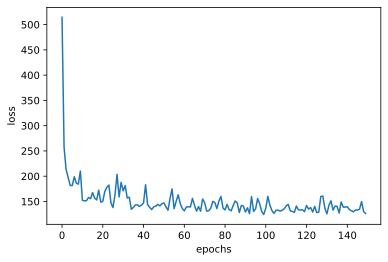

In [283]:
pd.DataFrame(history_2.history)['mae'].plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [284]:
labels_pred = model_2.predict(windows_test)

In [285]:
model_2_results = errors(labels_test, labels_pred)
model_2_results

{'MAE': 707.02325,
 'MSE': 1570225.5,
 'RMSE': 1253.0864,
 'MAPE': 2.6155357,
 'MASE': 1.0189718831894525}

In [286]:
np.squeeze(labels_test[:10]), np.squeeze(labels_pred[:10])

(array([5879.81683565, 6483.6170416 , 6446.44266715, 6537.68699039,
        6796.92519575, 6772.00730095, 6873.72004752, 6809.00456775,
        7277.70428162, 7175.66941817]),
 array([6480.268 , 5730.5454, 6136.099 , 6135.361 , 6463.4077, 6733.096 ,
        6760.2695, 6889.888 , 6985.6167, 7137.292 ], dtype=float32))

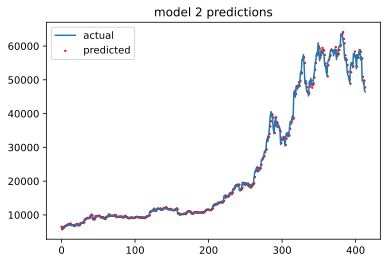

In [287]:
plt.scatter(range(len(labels_pred)),labels_pred,color='r', s=2, label='predicted')
plt.plot(labels_test, label='actual')
plt.legend()
plt.title('model 2 predictions');